# Un traçeur de fonctions dérivées
En mathématiques, la dérivée d'une fonction d'une variable réelle mesure l'ampleur du changement de la valeur de la fonction (valeur de sortie) par rapport à un petit changement de son argument (valeur d'entrée). Les calculs de dérivées sont un outil fondamental du calcul infinitésimal. Par exemple, la dérivée de la position d'un objet en mouvement par rapport au temps est la vitesse (instantanée) de l'objet.

## Rappel : la fonction dérivée en 45 secondes

Si $f$ est une fonction d'une variable réelle, on commence par considérer le **taux d'accroissement** entre deux points $x_0$ et $x_0 + h$  (il dépend de $h$ !): 
$$\Delta_{x_0}(h) = \frac{f(x_0 + h) - f(x_0}{h})$$
![Taux d'accroissement](https://e.educlever.com/img/3/8/9/0/389097.jpg)

Si on prend un tout petit déplacement vers la droite, le taux d'accroissement correspond au coefficient directeur de la tangente à la courbe représentative de $f$ en $x_0$.

![tangente](https://profgra.org/lycee/tangente-a-une-courbe.jpg)

On note $$ f'(x) = \lim_{h \rightarrow 0} \Delta_{x_0}(h) $$

Et on définit la fonction dérivée comme la fonction qui à tout $x$ associe $f'(x)$.

**C'est la fonction dérivée de $f$** (elle n'existe pas toujours, pas nécessairement partout...bref.)

En spé Maths vous avez abondemment travailler cette notion, et sans doute appris un beau tableau de dérivées usuelles à connaitre. 

![Tableau derivees usuelles](https://mathbox.fr/wp-content/uploads/img_3353.jpg)

**Je vous propose de construire, en utilisant la programmation fonctionnelle, un traçeur de fonctions dérivées.**

## 1. Tracer la courbe représentative d'une fonction
### Préparation
* Définir une fonction ```f``` qui prend en paramètre un nombre "x" et qui retourne...disons le cube du paramètre.
* Ecrire une fonction qui prends trois paramètres ```xmin```,```xmax``` et ```pas``` et qui construit un tableau de nombres séparés de ```pas``` qui commence à ```xmin```, se termine *avant* ```xmax```.

*Attention* : La difficulté ici...c'est que le **pas** n'est pas entier ! Il y a plein de façon pour faire ça, à la main, en utilisant ```numpy.linspace```, en utilisant des listes en compréhension...histoire de vous préparer aux épreuves du BAC...implémentez cette fonction "à la main" ou bien si vraiment vous trouvez ça trop facile, avec une liste en compréhension (si vous ne savez plus ce qu'est une liste en compréhension c'est par là : [lien](http://python.lycee.free.fr/list_comprehensions.html)

* Ecrire une fonction qui prends en paramètre *une fonction* et un tableau d'antécédents, et qui retourne le tableau de valeur correspondant (de même taille, composée des images des éléments du tableau d'antécédent).


In [1]:
def f(x):
    return x ** 3

def antecedents(xmin, xmax, pas):
    return [xmin + pas * i for i in range(int((xmax-xmin)/pas))]
        
def images(f, antecedents):
    images = []
    for x in antecedents:
        images.append(f(x))
    return images
    
print(antecedents(-3,3.5,0.5)) 
# [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

print(images(f, antecedents(-3,3,0.5)))
# [-27.0, -15.625, -8.0, -3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375, 8.0, 15.625]

[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
[-27.0, -15.625, -8.0, -3.375, -1.0, -0.125, 0.0, 0.125, 1.0, 3.375, 8.0, 15.625]


### Gestion de l'affichage
En utilisant la librairie Matplotlib, tracez la courbe représentative associée à la fonction et au tableau d'antecédents (voir [ici](https://courspython.com/introduction-courbes.html))
![tada](https://i.imgur.com/LFQMKeY.png)

**Attention** : ici on sort clairement du paradigme fonctionnel, la librairie matplotlib manipule un objet "plt" (pour plot) auquel on ajoute succéssivement des éléments. On exploite clairement un mécanisme d'effet de bord !!!


In [2]:
import matplotlib.pyplot as plt

def affiche(f, nom, min, max, pas, couleur):
    
    xs = antecedents(min,max, pas)
    ys = images(f, xs)

    plt.plot(xs, ys, label=nom, color=couleur)


affiche(f, "$f(x)$", -3,3.5,0.25, "r")

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

## 2. Un calculateur de dérivée (l'arrivée des lambdas !)
Si on considère (comme depuis le début du TP) la fonction cube $f : x \mapsto x^3$ sa fonction dérivée est $$f' : x \mapsto 3 x^2$$. Vérifions ça numériquement...

* Ecrire une fonction qui prend en paramètre une fonction et un point, et qui retourne le nombre dérivé de la fonction en ce point, en prenant une valeur fixe pour ```h = 0.001``` (on ne traitera pas les cas où la fonction n'existe pas)
* Ecrire une fonction qui prend en paramètre une fonction et qui retourne la fonction dérivée


In [3]:
def nombreDerive(f,x):
    h = 0.01
    return (f(x+h) - f(x))/h

def derivee(f):
    return lambda x : nombreDerive(f,x)



print(derivee(f)(0))
print(derivee(f)(2))
# 0.00010000000000000002
# 12.060099999999707


0.00010000000000000002
12.060099999999707


## 3. Un traçeur de dérivées
* Tracer sur le même graphique la fonction (en rouge) et sa dérivée 

Est-ce que vous voyez apparaitre le graphe de la fonction $x\mapsto 3 x^2$ ?

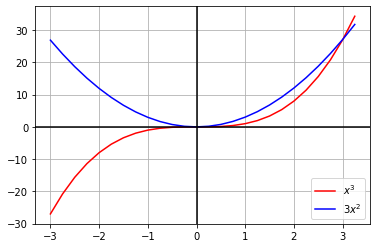

In [4]:
affiche(f, "$x^3$", -3,3.5,0.25, "r")
affiche(derivee(f),"$3 x^2$", -3,3.5,0.25,"b")

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()

* Tracer sur le même graphique la fonction $ x \mapsto cos(x)$ et sa dérivée (vous noterez...que on n'importe *pas* le sinus, Python ne le connait pas ! mais on retrouve sa courbe !)

![cosinus](https://i.imgur.com/veiMcyt.png)


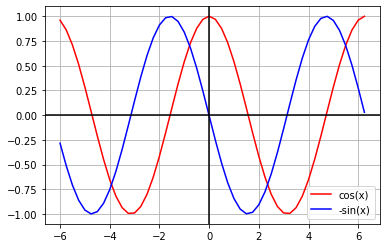

In [5]:
from math import cos

affiche(lambda x : cos(x),"cos(x)", -6,6.5,0.25, "r")
affiche(derivee(lambda x : cos(x)),"-sin(x)", -6,6.5,0.25,"b")

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()

* Tracer sur le même graphique la fonction $ x^2 + cos(x) \times x$ et sa dérivée

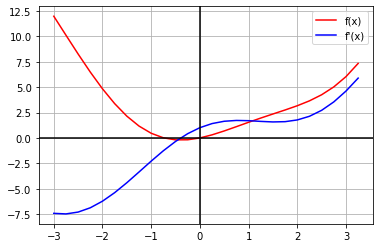

In [6]:
affiche(lambda x : x**2 + cos(x)*x,"f(x)", -3,3.5,0.25, "r")
affiche(derivee(lambda x : x**2 + cos(x)*x), "f'(x)", -3,3.5,0.25,"b")

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()

* Tracer sur le même graphique la fonction $ \frac{sin(x)}{x}$ et sa dérivée (sur [-20,20]). Surprise, elle devrait exploser en 0 (et il va falloir traiter le problème dans le code...) mais finalement, non.
Vous êtes en train d'observer que $$\lim_{x \rightarrow 0}\frac{sin(x)}{x} = 1$$ Peut être que vous savez le démontrer...peut être pas...

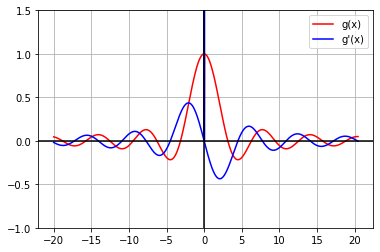

In [7]:
from math import sin
def g(x):
    if (x!=0):
        return sin(x)/x
    else :
        return 0

affiche(g,"g(x)", -20,20.5,0.05, "r")
affiche(derivee(g), "g'(x)", -20,20.5,0.05,"b")

plt.ylim(-1,1.5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()

## 4. Saisie utilisateur : de la magie noire
En Python, la fonction ```eval``` permet d'interpreter une chaîne de caractère comme une expression.
Exécuter le code suivant :


In [8]:
x = 10
eval("x**2")

100

En utilisant les lambdas, et tout ce que nous venons de voir, écrire un programme qui demande à l'utilisateur l'expression d'une fonction mathématiques, et qui trace le graphe de la fonction et de sa dérivée sur l'intervalle $[-10,10]$.

Donner l'expression de la fonction que vous souhaitez étudier: f(x)=x + cos(x)


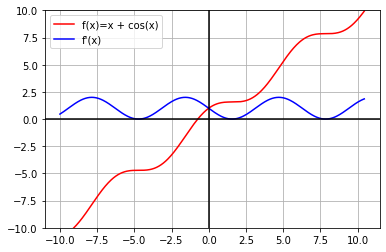

In [9]:
from math import * 

def f(expression):
    return lambda x : eval(expression)

expression=input("Donner l'expression de la fonction que vous souhaitez étudier: f(x)=")

affiche(f(expression),"f(x)="+expression, -10,10.5,0.05, "r")
affiche(derivee(f(expression)), "f'(x)", -10,10.5,0.05,"b")

plt.ylim(-10,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.legend()
plt.show()

# afficher le graphique de la fonction (en rouge) et de sa dérivée (en bleu)

Vous allez vous rendre compte qu'un certains nombre de fonctions ne se laissent pas faire...mais que pour les fonctions "de base" tout ça fonctionne plutôt bien !